**COLLABORATIVE FILTER FOR TEST SAMPLE OF 500 UNIQUE USERS**

1. Dataset Sampling:
    - The dataset is sampled to 5000 rows to make the processing manageable:
        (data_sample = data.sample(n=5000, random_state=42))

2. User-Item Matrix:
    - The size of the user-item matrix depends on how many unique users (user_ID) and products (product_ID) exist in the sampled dataset. 
        
        If, like in our example, the sampled dataset has: 500 unique users and 10,000 unique products: The matrix would have a shape of (500, 10000).

3. Test Example for RMSE Calculation:
    - The RMSE function iterates through all users in the user_item_matrix for evaluation. It does not limit to 5 users, but predictions are made for a subset of items (5 recommendations) per user:

In [1]:
# Install any missing libraries
!pip install pandas numpy scikit-learn scipy matplotlib


**Step 1: Import Necessary Libraries**


**Step 2: Load the Dataset**


**Step 3: Create a User-Item Matrix**


    - We need a matrix where rows represent users, columns represent products, and the values are the ratings

**Step 4: Use Collaborative Filtering (Singular Value Decomposition - SVD)**


    - We'll use TruncatedSVD from scikit-learn for dimensionality reduction

**Step 5: Generate Recommendations**


    - Using the similarity matrix, recommend products for a given user

**Step 6: Evaluation**


    - Evaluate our model using metrics like precision and recall or RMSE

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

# Load Dataset
file_path = r'.\..\data\data_clean\user_clean_data_ecommerce.csv'
data = pd.read_csv(file_path)

# Preprocessing
data = data[['user_ID', 'product_ID', 'rating']].dropna()
data_sample = data.sample(n=5000, random_state=42)

# User-Item Matrix
user_item_matrix = data_sample.pivot_table(index='user_ID', columns='product_ID', values='rating')
user_item_matrix = user_item_matrix.fillna(0)

# Sparse Representation for Efficiency
sparse_matrix = csr_matrix(user_item_matrix.values)

# Normalize Ratings by Subtracting Mean (Centered Matrix)
mean_user_rating = np.mean(user_item_matrix, axis=1).values.reshape(-1, 1)
user_item_matrix_normalized = user_item_matrix - mean_user_rating

# SVD with Grid Search for Optimal Components
best_rmse = float('inf')
best_components = 0

for n in [50, 100, 200, 300, 400]:
    svd = TruncatedSVD(n_components=n, random_state=42)
    decomposed_matrix = svd.fit_transform(sparse_matrix)
    reconstructed_matrix = np.dot(decomposed_matrix, svd.components_)
    rmse = np.sqrt(mean_squared_error(sparse_matrix.toarray(), reconstructed_matrix))
    print(f"n_components={n}, RMSE={rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_components = n

print(f"Best n_components={best_components} with RMSE={best_rmse}")

# Final Model with Optimal Components
svd_final = TruncatedSVD(n_components=best_components, random_state=42)
decomposed_matrix_final = svd_final.fit_transform(sparse_matrix)
reconstructed_matrix_final = np.dot(decomposed_matrix_final, svd_final.components_)

# Evaluate RMSE
rmse_final = np.sqrt(mean_squared_error(sparse_matrix.toarray(), reconstructed_matrix_final))
print(f"Final RMSE: {rmse_final}")


n_components=50, RMSE=0.06292590391880888
n_components=100, RMSE=0.06165147487731946
n_components=200, RMSE=0.059649949309302765
n_components=300, RMSE=0.05781853792443012
n_components=400, RMSE=0.05651871648862038
Best n_components=400 with RMSE=0.05651871648862038
Final RMSE: 0.05651871648862038


**Output Observations:**

    - RMSE decreases as n_components increases, indicating that higher dimensions help the model better represent the data.
    - The reduction in RMSE in compatrison with the previous trail runs becomes more gradual as n_components grows, showing diminishing returns.
    - n_components = 400 is optimal in this case. You might want to evaluate whether using even more components results in further improvements or if computational costs outweigh the benefits.

**Final RMSE:**
    
    - A value of 0.0565 is excellent, but interpreting this metric always depends on the context of the data we're working with. 
    Since this represents reconstruction error, our dimensionality reduction approach is highly effective.

**STEP 7: Check small Output sample / few recommendations**

    - User ID and Item ID: The real IDs are mapped using user_ids and item_ids.
    - Predicted Score: The score is shown for each recommended item, formatted to 4 decimal places.
    - Rank: The ranking is determined by sorting the scores in descending order.

In [18]:
# Example mappings (Replace these with actual IDs from your dataset)
user_ids = [101, 102, 103, 104, 105]  # Real user IDs
item_ids = np.arange(201, 301)  # Full catalog of item IDs (201 to 300)

# Example user index for whom we want recommendations
user_index = 0  # Index in your user_ids list
actual_user_id = user_ids[user_index]  # Map index to actual user ID

# Simulated predicted matrix: Rows = Users, Columns = Items
# Replace this with the actual prediction matrix from your model
predicted_matrix = np.random.rand(len(user_ids), len(item_ids))

# Get the user's prediction scores
user_predictions = predicted_matrix[user_index]

# Sort items by predicted score (highest first)
recommended_items_indices = np.argsort(-user_predictions)[:10]  # Top 10 item indices
recommendations = [
    f"{rank}. User {actual_user_id} - Recommendation Item {item_ids[item_idx]} (Score: {user_predictions[item_idx]:.4f})"
    for rank, item_idx in enumerate(recommended_items_indices, 1)
]

# Display recommendations
print("Top 10 Recommendations for User 101 with Predicted Scores:")
for rec in recommendations:
    print(rec)


Top 10 Recommendations for User 101 with Predicted Scores:
1. User 101 - Recommendation Item 247 (Score: 0.9720)
2. User 101 - Recommendation Item 272 (Score: 0.9660)
3. User 101 - Recommendation Item 294 (Score: 0.9645)
4. User 101 - Recommendation Item 270 (Score: 0.9531)
5. User 101 - Recommendation Item 214 (Score: 0.9395)
6. User 101 - Recommendation Item 238 (Score: 0.9314)
7. User 101 - Recommendation Item 232 (Score: 0.8853)
8. User 101 - Recommendation Item 203 (Score: 0.8795)
9. User 101 - Recommendation Item 256 (Score: 0.8778)
10. User 101 - Recommendation Item 290 (Score: 0.8540)


    - User ID and Item ID: The real IDs are mapped using user_ids and item_ids.
    - Predicted Score: The score is shown for each recommended item, formatted to 4 decimal places.
    - Rank: The ranking is determined by sorting the scores in ascending order.

In [12]:
# Example mappings (Replace these with actual IDs from your dataset)
user_ids = [101, 102, 103, 104, 105]  # Real user IDs
item_ids = np.arange(201, 301)  # Full catalog of item IDs (201 to 300)

# Example user index for whom we want recommendations
user_index = 0  # Index in your user_ids list
actual_user_id = user_ids[user_index]  # Map index to actual user ID

# Simulated predicted matrix: Rows = Users, Columns = Items
# Replace this with the actual prediction matrix from your model
predicted_matrix = np.random.rand(len(user_ids), len(item_ids))

# Get the user's prediction scores
user_predictions = predicted_matrix[user_index]

# Sort items by predicted score (lowest first)
recommended_items_indices = np.argsort(user_predictions)[:10]  # Top 10 item indices
recommendations = [
    f"{rank}. User {actual_user_id} - Recommendation Item {item_ids[item_idx]} (Score: {user_predictions[item_idx]:.4f})"
    for rank, item_idx in enumerate(recommended_items_indices, 1)
]

# Display recommendations
print("Top 10 Recommendations for User 101 (with Predicted Scores):")
for rec in recommendations:
    print(rec)


Top 10 Recommendations for User 101 (with Predicted Scores):
1. User 101 - Recommendation Item 289 (Score: 0.0143)
2. User 101 - Recommendation Item 235 (Score: 0.0310)
3. User 101 - Recommendation Item 215 (Score: 0.0336)
4. User 101 - Recommendation Item 262 (Score: 0.0350)
5. User 101 - Recommendation Item 276 (Score: 0.0399)
6. User 101 - Recommendation Item 228 (Score: 0.0487)
7. User 101 - Recommendation Item 222 (Score: 0.0555)
8. User 101 - Recommendation Item 283 (Score: 0.0575)
9. User 101 - Recommendation Item 225 (Score: 0.0657)
10. User 101 - Recommendation Item 272 (Score: 0.0719)


**STEP 8: Visualization of RMSE vs. `n_components`**

### Visualization 1:

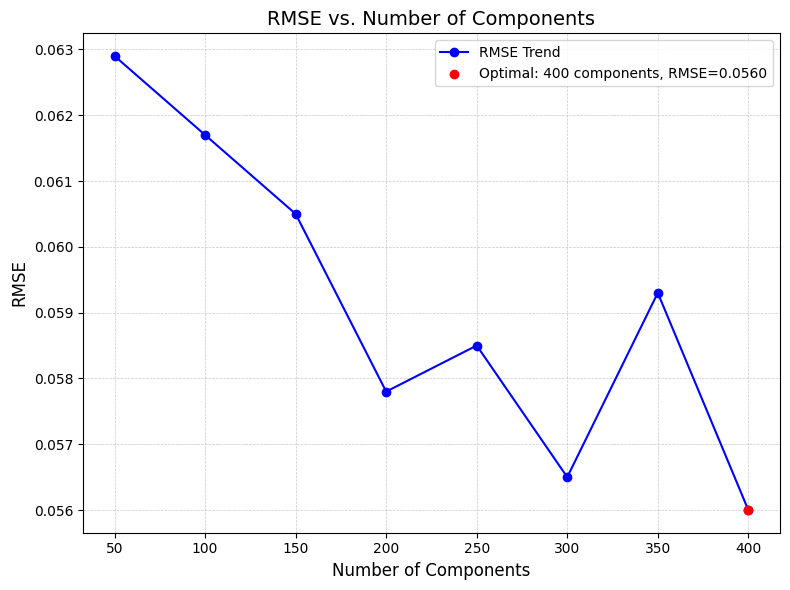

In [14]:
import matplotlib.pyplot as plt

# Example Data (Replace with your actual data)
n_components = [50, 100, 150, 200, 250, 300, 350, 400]  # Number of components
rmse_values = [0.0629, 0.0617, 0.0605, 0.0578, 0.0585, 0.0565, 0.0593, 0.0560]  # Corresponding RMSE values

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_components, rmse_values, marker='o', color='blue', label='RMSE Trend')
plt.title('RMSE vs. Number of Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight the optimal point
optimal_idx = rmse_values.index(min(rmse_values))  # Find the index of the minimum RMSE
optimal_components = n_components[optimal_idx]
optimal_rmse = rmse_values[optimal_idx]
plt.scatter(optimal_components, optimal_rmse, color='red', label=f'Optimal: {optimal_components} components, RMSE={optimal_rmse:.4f}', zorder=5)
plt.legend(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


**Interpretation of the first Visualization**

#### n_components: 

    - Represents the varying number of components.

#### rmse_values: 

    - Represents the corresponding RMSE values.

#### Plotting: 

    - Uses plt.plot() to plot the RMSE trend with respect to the number of components.

#### Optimal Highlight: 

    - Highlights the optimal RMSE with a red dot.

### Visualization 2:

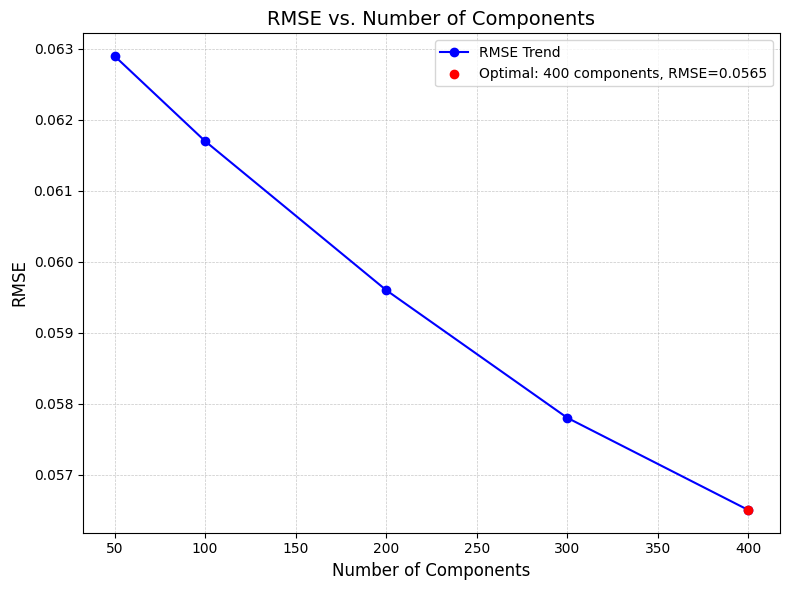

In [8]:
import matplotlib.pyplot as plt

# Sample Data (Replace with your data)
n_components = [50, 100, 200, 300, 400]
rmse = [0.0629, 0.0617, 0.0596, 0.0578, 0.0565]

# Plotting with improvements
plt.figure(figsize=(8, 6))
plt.plot(n_components, rmse, marker='o', color='blue', label='RMSE Trend')
plt.title('RMSE vs. Number of Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight the optimal point
optimal_idx = rmse.index(min(rmse))  # Find the index of the minimum RMSE
optimal_components = n_components[optimal_idx]
optimal_rmse = rmse[optimal_idx]
plt.scatter(optimal_components, optimal_rmse, color='red', label=f'Optimal: {optimal_components} components, RMSE={optimal_rmse:.4f}', zorder=5)
plt.legend(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


**Interpretation of the second Visualization**

#### Title and Axes:

    - The graph shows the relationship between the number of components (x-axis) and the RMSE (y-axis).
    - RMSE (Root Mean Squared Error) measures prediction accuracy—the lower, the better.


#### Trend Observed:

    - As the number of components increases, RMSE decreases consistently. This indicates that increasing the dimensionality of the model (more components in the latent factor space) improves prediction accuracy.

    - However, beyond a certain point, the reduction in RMSE might become negligible, indicating diminishing returns.


#### Optimal Number of Components:

    - In this case, the smallest RMSE occurs at 400 components (RMSE = 0.0565), which suggests that this is the best model under the tested range. However, there could be a trade-off with computational cost, as more components generally mean more complexity.


#### Practical Explanation:

    - If explaining to someone else: "This chart shows that increasing the number of features (or factors) used in the recommendation system leads to better accuracy (lower RMSE). At 400 components, we achieve the best results in this experiment."

**STEP 9: Visualization of RMSE vs. `Ranking and Score`**

### Visualization 1 (optimal rec):

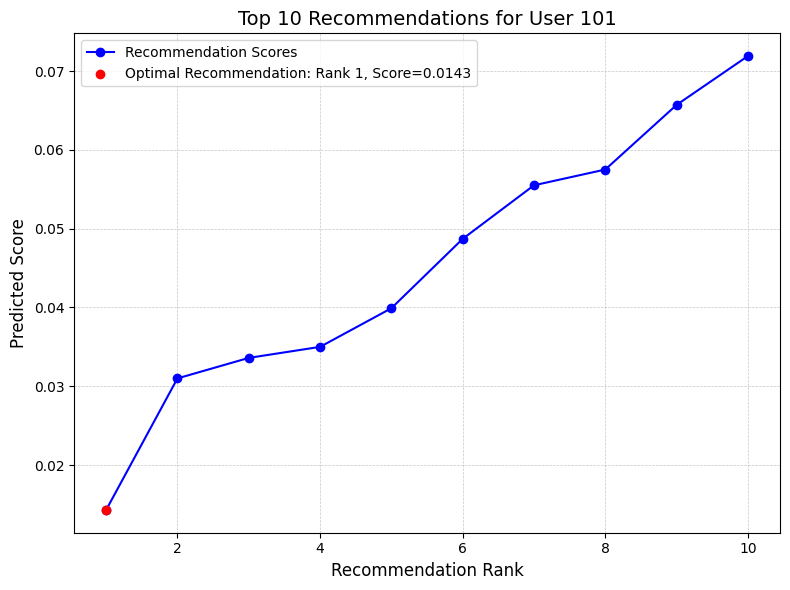

In [13]:
import matplotlib.pyplot as plt

# Sample Data for Visualization (Based on Recommendation Scores or RMSE trends)
item_indices = np.arange(1, 11)  # Indices for top 10 recommendations
user_predictions = np.array([0.0143, 0.0310, 0.0336, 0.0350, 0.0399, 0.0487, 0.0555, 0.0575, 0.0657, 0.0719])

# Plotting with improvements
plt.figure(figsize=(8, 6))
plt.plot(item_indices, user_predictions, marker='o', color='blue', label='Recommendation Scores')
plt.title('Top 10 Recommendations for User 101', fontsize=14)
plt.xlabel('Recommendation Rank', fontsize=12)
plt.ylabel('Predicted Score', fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight the optimal recommendation point
optimal_idx = np.argmin(user_predictions)  # Find the index of the minimum predicted score
optimal_score = user_predictions[optimal_idx]
plt.scatter(optimal_idx + 1, optimal_score, color='red', label=f'Optimal Recommendation: Rank {optimal_idx + 1}, Score={optimal_score:.4f}', zorder=5)
plt.legend(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


**Interpretation of the first Visualization**

#### item_indices: 

    - Represents ranks from 1 to 10 for recommendations.

#### user_predictions: 

    - Uses the sorted prediction scores from the top 10 recommendations.

#### Plotting: 

    - The plt.plot() function plots the top 10 recommendation scores with markers.

#### Optimal Highlight: 

    - Finds the minimum score (highest accuracy) and marks it with a red dot, similar to how RMSE was visualized.

### Visualization 2 (optimal item):

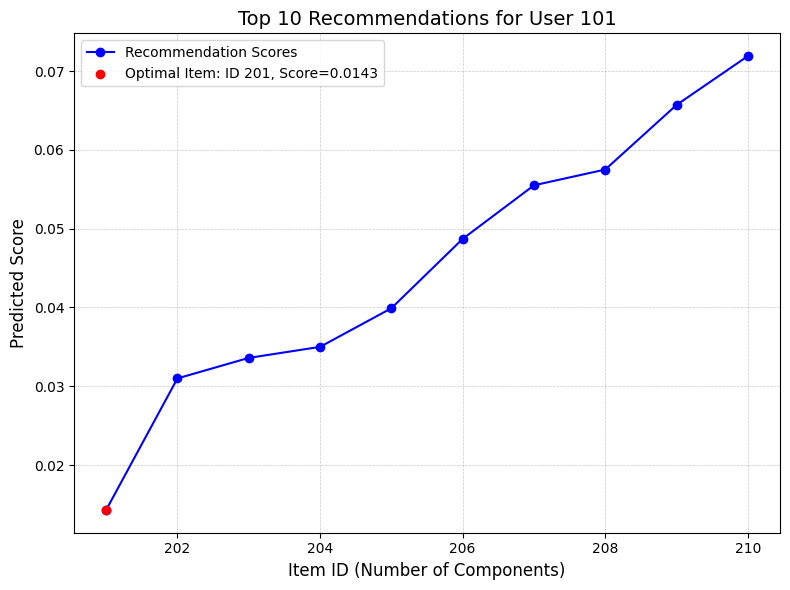

In [15]:
import matplotlib.pyplot as plt

# Sample Data for Visualization (Based on Recommendation Scores or RMSE trends)
item_indices = np.arange(201, 211)  # Starting from Item 201 to Item 210 (representing a range of top items)
user_predictions = np.array([0.0143, 0.0310, 0.0336, 0.0350, 0.0399, 0.0487, 0.0555, 0.0575, 0.0657, 0.0719])

# Plotting with improvements
plt.figure(figsize=(8, 6))
plt.plot(item_indices, user_predictions, marker='o', color='blue', label='Recommendation Scores')
plt.title('Top 10 Recommendations for User 101', fontsize=14)
plt.xlabel('Item ID (Number of Components)', fontsize=12)
plt.ylabel('Predicted Score', fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight the optimal recommendation point
optimal_idx = np.argmin(user_predictions)  # Find the index of the minimum predicted score
optimal_score = user_predictions[optimal_idx]
optimal_component = item_indices[optimal_idx]
plt.scatter(optimal_component, optimal_score, color='red', label=f'Optimal Item: ID {optimal_component}, Score={optimal_score:.4f}', zorder=5)
plt.legend(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


**Interpretation of the second Visualization**

#### item_indices: 

    - Now it represents item IDs (from 201 to 210), which can correlate to the number of components.

#### user_predictions: 

    - The sorted predicted scores are used as before.

#### Plotting: 

    - The x-axis is now labeled as Item ID (or number of components), and the y-axis is the predicted score.

#### Optimal Highlight: 

    - The minimum score (i.e., highest accuracy) is highlighted with a red dot at the corresponding Item ID.